# Практика 8 Неоднородные цепи Маркова и их применение

## Цели
- Изучить неоднородные дискретные цепи Маркова.
- Научиться вычислять вероятности состояний системы с помощью Python.

---
## Введение

### Краткое напоминание о цепях Маркова

- **Состояния, вероятности переходов.**
- **Условие Маркова**: будущее зависит только от настоящего, а не от прошлого.
- **Однородные цепи Маркова**: вероятности переходов постоянны во времени.

---

### Понятие неоднородности

- **Что такое неоднородная цепь Маркова?**  
Вероятности переходов могут меняться со временем.

- **Почему они важны?**  
Моделирование систем, в которых меняются факторы, влияющие на переходы:  
    - погода  
    - экономическая ситуация  
    - поведение пользователей  
    - состояние оборудования и т. д.

- **Формализация:**  
    \( P(t) \), где \( P(t) \) — матрица переходов в момент времени \( t \).
## 1. Теоретические сведения

**Неоднородная цепь Маркова** — стохастический процесс, в котором матрица переходных вероятностей изменяется во времени:

$
P(t) =
\begin{bmatrix}
p_{11}(t) & p_{12}(t) & ... & p_{1n}(t) \\
p_{21}(t) & p_{22}(t) & ... & p_{2n}(t) \\
... & ... & ... & ... \\
p_{n1}(t) & p_{n2}(t) & ... & p_{nn}(t)
\end{bmatrix}
$

Вероятности состояний на шаге \(T\):

$
\pi(T) = \pi(0) \cdot P(1) \cdot P(2) \cdot ... \cdot P(T)
$

---

## Часть 1. Моделирование работы оборудования

**Описание задачи:**  
Представим систему, состоящую из одного устройства, которое может находиться в одном из трёх состояний:
1. **«Отлично» (A):** устройство работает без сбоев.  
2. **«Износ» (B):** устройство работает, но имеет признаки износа.
3. **«Сбой» (C):** устройство вышло из строя.

Предположим, что вероятности переходов между этими состояниями меняются со временем (например, из-за старения или обслуживания).

---

### Задание 1.1: Определение матриц переходов, зависящих от времени

- Предположим, что изначально устройство новое, вероятность перехода в «Сбой» низкая, а в состояние «Износ» — средняя.
- Задайте матрицу переходов \( P(0) \) для первого периода (например, первых 100 шагов/дней):

$
P(0) =
\begin{bmatrix}
0.95 & 0.04 & 0.01 \\
0 & 0.8 & 0.2 \\
0 & 0 & 1
\end{bmatrix}
$

*(Состояние C — поглощающее)*.

- Устройство начало изнашиваться, вероятность сбоя возрастает.
- Матрица переходов \( P(1) \) для второго периода (следующие 100 шагов/дней):

$
P(1) =
\begin{bmatrix}
0.85 & 0.13 & 0.02 \\
0.2 & 0.7 & 0.1 \\
0 & 0 & 1
\end{bmatrix}
$

---


- Устройство сильно изношено, риск поломки высок.
- Матрица переходов \( P(2) \) для третьего периода (последние 100 шагов/дней):

$
P(2) =
\begin{bmatrix}
0.6 & 0.3 & 0.1 \\
0.4 & 0.5 & 0.1 \\
0 & 0 & 1
\end{bmatrix}
$

### Задание 1.2: Моделирование работы устройства

**Используйте Python:**
- `numpy` для работы с матрицами.
- `scipy.linalg.expm` для вычисления матричной экспоненты (при необходимости). В нашем случае просто используем дискретные матрицы для шагов.
- У нас есть 3 разные матрицы переходов для 3 этапов. Мы моделируем процесс, поочередно применяя соответствующую матрицу.

#### Реализация:

i. Создайте список матриц переходов: `matrices = [P0, P1, P2]`  
ii. Задайте начальное состояние, например, “Отлично” — вектор `[1, 0, 0]`.  
iii. Задайте общее количество шагов моделирования (например, 300).  
iv. Напишите цикл, который:
- Определяет, какую матрицу использовать на текущем этапе (по длительности периода).
- Умножает текущее распределение вероятностей на соответствующую матрицу переходов.
- Запоминает полученное распределение для каждого шага.

---


In [ ]:


import numpy as np
# from scipy.linalg import expm # Если бы мы работали с непрерывными Q-матрицами

# --- Задание 1.1: Матрицы переходов ---
# Предполагаем, что состояния: 0 - Отлично, 1 - Износ, 2 - Сбой (поглощающее)
P0 = np.array([[0.95, 0.04, 0.01],  # P(0)
               [0.1,  0.8,  0.1 ],
               [0,    0,    1   ]])

P1 = np.array([[0.85, 0.13, 0.02],  # P(1)
               [0.2,  0.7,  0.1 ],
               [0,    0,    1   ]])

P2 = np.array([[0.6,  0.3,  0.1 ],  # P(2)
               [0.4,  0.5,  0.1 ],
               [0,    0,    1   ]])

transition_matrices = [P0, P1, P2]
period_lengths = [100, 100, 100] # Длительность каждого периода

# --- Задание 1.2: Моделирование ---
total_steps = sum(period_lengths)
initial_state = np.array([1.0, 0.0, 0.0]) # Начинаем в состоянии "Отлично"

current_state_distribution = initial_state
state_history = [initial_state] # Список для хранения распределений по всем шагам

current_period_index = 0
steps_in_current_period = 0

for step in range(total_steps):
    # Определяем, какую матрицу использовать
    if steps_in_current_period >= period_lengths[current_period_index]:
        current_period_index += 1
        steps_in_current_period = 0

    current_matrix = transition_matrices[current_period_index]

    # Вычисляем распределение на следующем шаге
    current_state_distribution = current_state_distribution @ current_matrix

    # Ограничиваем значения очень малыми числами до 0, чтобы избежать накапливания ошибок
    current_state_distribution[current_state_distribution < 1e-9] = 0
    # Нормализуем, если необходимо (хотя при правильных P, сумма должна оставаться 1)
    current_state_distribution /= np.sum(current_state_distribution)

    state_history.append(current_state_distribution)
    steps_in_current_period += 1

# --- Анализ результатов ---
print(f"Начальное состояние: {initial_state}")
print(f"Распределение в конце моделирования (шаг {total_steps}): {state_history[-1]}")

Начальное состояние: [1. 0. 0.]
Распределение в конце моделирования (шаг 300): [8.90154146e-09 6.67615609e-09 9.99999984e-01]


## Часть 2. Моделирование динамики погоды

**Описание задачи:**  
Пусть погода в городе может быть в одном из двух состояний:
1. **Солнечно** (S)
2. **Дождливо** (R)

Вероятность переходов зависит от времени года (например, летом чаще солнечно, зимой — дождливо).

---

### Задание 2.1: Определение матриц переходов, зависящих от времени


** (лето): ** высокая вероятность солнца, низкая вероятность дождя.
$
P_{summer} =
\begin{bmatrix}
0.9 & 0.1 \\
0.3 & 0.7
\end{bmatrix}
$
- Сохранение солнца — 0.9, переход к дождю — 0.1
- Сохранение дождя — 0.7, переход к солнцу — 0.3

---

**(осень):** вероятности ближе к равным

$
P_{autumn} =
\begin{bmatrix}
0.7 & 0.3 \\
0.4 & 0.6
\end{bmatrix}
$

---

**(зима):** высокая вероятность дождя, низкая солнца

$
P_{winter} =
\begin{bmatrix}
0.5 & 0.5 \\
0.6 & 0.4
\end{bmatrix}
$

**(весна):** переходный период.

$
P_{spring} =
\begin{bmatrix}
0.8 & 0.2 \\
0.35 & 0.65
\end{bmatrix}
$

---

### Задание 2.2: Моделирование погоды за год

**Реализация:**
1. Используйте заданные матрицы для сезонов.
2. Задайте начальное состояние (например, «Солнечно»).
3. Смоделируйте погоду на год, используя заданную продолжительность сезонов (например, каждая длится 90 дней).
4. Сохраняйте историю состояний.


--- Моделирование погоды ---
Начальное состояние погоды: [1. 0.] (Солнечно)
Распределение погоды в конце года (день 365): [0.63636364 0.36363636]


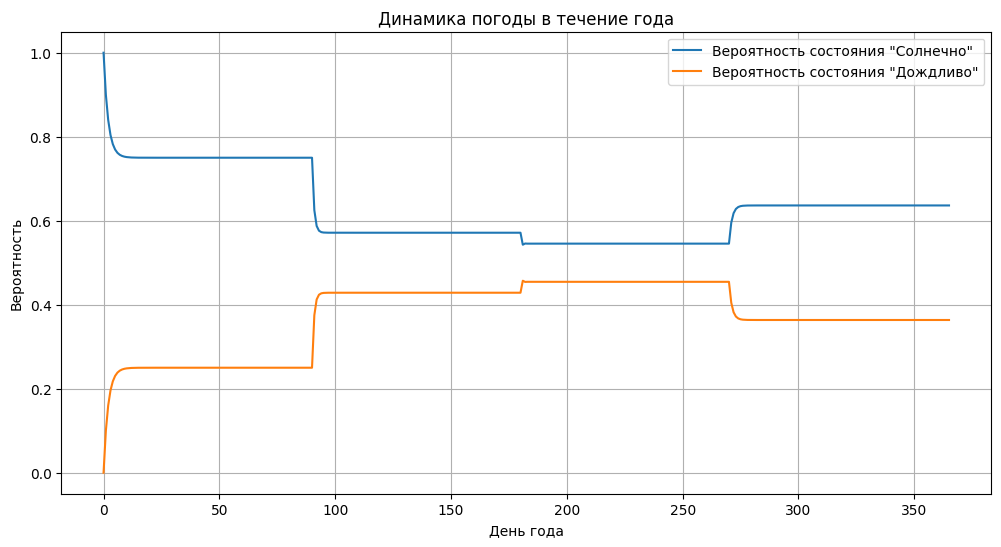

In [ ]:
import numpy as np
# import matplotlib.pyplot as plt # Для визуализации

# --- Задание 2.1: Матрицы переходов для сезонов ---
# Состояния: 0 - Солнечно, 1 - Дождливо
P_Summer = np.array([[0.9, 0.1],
                     [0.3, 0.7]])

P_Autumn = np.array([[0.7, 0.3],
                     [0.4, 0.6]])

P_Winter = np.array([[0.5, 0.5],
                     [0.6, 0.4]])

P_Spring = np.array([[0.8, 0.2],
                     [0.35, 0.65]])

transition_matrices_weather = [P_Summer, P_Autumn, P_Winter, P_Spring]
# Приблизительное количество дней в каждом сезоне (365 дней в году)
season_lengths = [90, 90, 90, 95]

# --- Задание 2.2: Моделирование погоды ---
total_days = sum(season_lengths)
initial_weather_state = np.array([1.0, 0.0]) # Начинаем с "Солнечно"

current_weather_distribution = initial_weather_state
weather_history = [initial_weather_state]

current_season_index = 0
days_in_current_season = 0

for day in range(total_days):
    # Определяем, какую матрицу использовать
    if days_in_current_season >= season_lengths[current_season_index]:
        current_season_index = (current_season_index + 1) % len(transition_matrices_weather) # Циклический переход по сезонам
        days_in_current_season = 0

    current_matrix = transition_matrices_weather[current_season_index]

    # Вычисляем распределение на следующий день
    current_weather_distribution = current_weather_distribution @ current_matrix

    current_weather_distribution[current_weather_distribution < 1e-9] = 0
    current_weather_distribution /= np.sum(current_weather_distribution)

    weather_history.append(current_weather_distribution)
    days_in_current_season += 1

# --- Анализ результатов ---
print(f"\n--- Моделирование погоды ---")
print(f"Начальное состояние погоды: {initial_weather_state} (Солнечно)")
print(f"Распределение погоды в конце года (день {total_days}): {weather_history[-1]}")

# Опционально: визуализация
history_weather_array = np.array(weather_history)
plt.figure(figsize=(12, 6))
plt.plot(history_weather_array[:, 0], label='Вероятность состояния "Солнечно"')
plt.plot(history_weather_array[:, 1], label='Вероятность состояния "Дождливо"')
plt.xlabel('День года')
plt.ylabel('Вероятность')
plt.title('Динамика погоды в течение года')
plt.legend()
plt.grid(True)
plt.show()

## Часть 3  Практическая реализация

**Условие:**  
Система прогноза спроса на три товара {A, B, C}.  
Вероятности переходов зависят от сезона:

- **Лето:**

$
P_1 =
\begin{bmatrix}
0.6 & 0.3 & 0.1 \\
0.2 & 0.6 & 0.2 \\
0.1 & 0.3 & 0.6
\end{bmatrix}
$

- **Осень:**

$
P_2 =
\begin{bmatrix}
0.5 & 0.4 & 0.1 \\
0.3 & 0.5 & 0.2 \\
0.2 & 0.3 & 0.5
\end{bmatrix}
$

- Начальное распределение вероятностей:
$
\pi(0) = [0.6, 0.3, 0.1]
$

**Требуется:**  
1. Вычислить распределение вероятностей через 2 периода.  
2. Построить граф изменения вероятностей по времени.  
3. Вычислить наибольшую вероятность для каждого шага.

=== Часть 3: Система прогноза спроса ===
Начальное распределение: [0.6 0.3 0.1]
Распределение после 1 периода (лето): [0.43 0.39 0.18]
Распределение после 2 периодов (осень): [0.368 0.421 0.211]
Шаг 0: max вероятность = 0.6000 (Товар A)
Шаг 1: max вероятность = 0.4300 (Товар A)
Шаг 2: max вероятность = 0.4210 (Товар B)
Шаг 3: max вероятность = 0.4263 (Товар B)
Шаг 4: max вероятность = 0.4179 (Товар B)
Шаг 5: max вероятность = 0.4254 (Товар B)


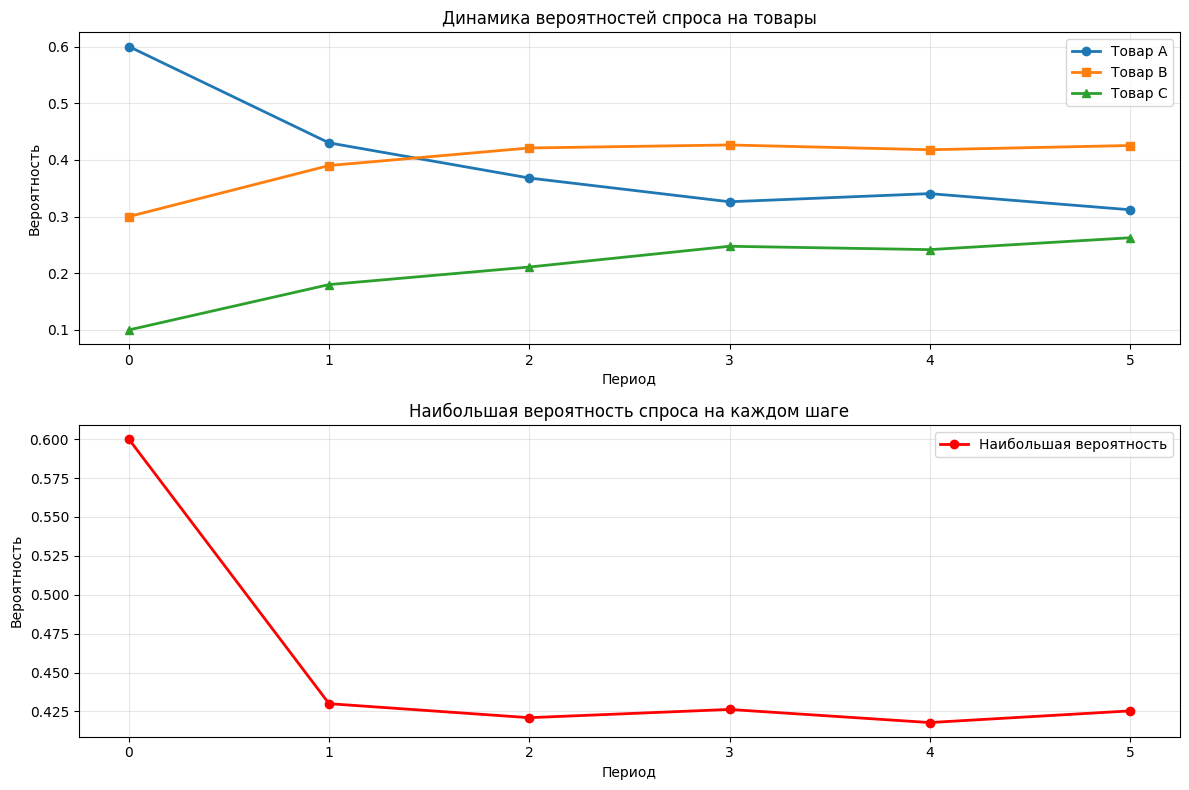


=== Анализ результатов ===
Начальное состояние: Товар A доминирует с вероятностью 0.6000
После 2 периодов: Товар B доминирует с вероятностью 0.4210

=== Стационарные распределения (для сравнения) ===
Стационарное распределение для лета: [0.28571429 0.42857143 0.28571429]
Стационарное распределение для осени: [0.34545455 0.41818182 0.23636364]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- Задание 3: Система прогноза спроса ---
# Состояния: 0 - Товар A, 1 - Товар B, 2 - Товар C

# Матрицы переходов для разных сезонов
P_лето = np.array([[0.6, 0.3, 0.1],
                   [0.2, 0.6, 0.2],
                   [0.1, 0.3, 0.6]])

P_осень = np.array([[0.5, 0.4, 0.1],
                    [0.3, 0.5, 0.2],
                    [0.2, 0.3, 0.5]])

# Начальное распределение
pi_0 = np.array([0.6, 0.3, 0.1])

# --- 1. Вычисление распределения через 2 периода ---
print("=== Часть 3: Система прогноза спроса ===")
print(f"Начальное распределение: {pi_0}")

# Первый период (лето)
pi_1 = pi_0 @ P_лето
print(f"Распределение после 1 периода (лето): {pi_1}")

# Второй период (осень)
pi_2 = pi_1 @ P_осень
print(f"Распределение после 2 периодов (осень): {pi_2}")

# --- 2. Построение графа изменения вероятностей ---
steps = 5  # Моделируем на 5 периодов
prob_history = [pi_0]

current_dist = pi_0
for step in range(steps):
    # Чередуем сезоны: лето, осень, лето, осень, ...
    if step % 2 == 0:
        current_dist = current_dist @ P_лето
    else:
        current_dist = current_dist @ P_осень

    # Нормализация (на всякий случай)
    current_dist /= np.sum(current_dist)
    prob_history.append(current_dist)

prob_history = np.array(prob_history)

# Визуализация
plt.figure(figsize=(12, 8))

# График вероятностей по времени
plt.subplot(2, 1, 1)
plt.plot(prob_history[:, 0], 'o-', label='Товар A', linewidth=2)
plt.plot(prob_history[:, 1], 's-', label='Товар B', linewidth=2)
plt.plot(prob_history[:, 2], '^-', label='Товар C', linewidth=2)
plt.xlabel('Период')
plt.ylabel('Вероятность')
plt.title('Динамика вероятностей спроса на товары')
plt.legend()
plt.grid(True, alpha=0.3)

# --- 3. Наибольшая вероятность для каждого шага ---
max_probs = []
max_products = []

for i, probs in enumerate(prob_history):
    max_prob = np.max(probs)
    max_product = np.argmax(probs)  # 0-A, 1-B, 2-C
    max_probs.append(max_prob)
    max_products.append(max_product)

    product_names = ['A', 'B', 'C']
    print(f"Шаг {i}: max вероятность = {max_prob:.4f} (Товар {product_names[max_product]})")

# График наибольших вероятностей
plt.subplot(2, 1, 2)
plt.plot(max_probs, 'o-', color='red', linewidth=2, label='Наибольшая вероятность')
plt.xlabel('Период')
plt.ylabel('Вероятность')
plt.title('Наибольшая вероятность спроса на каждом шаге')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Анализ результатов
print("\n=== Анализ результатов ===")
print(f"Начальное состояние: Товар A доминирует с вероятностью {pi_0[0]:.4f}")
print(f"После 2 периодов: Товар {product_names[np.argmax(pi_2)]} доминирует с вероятностью {np.max(pi_2):.4f}")

# Стационарное распределение (если бы матрицы не менялись)
print("\n=== Стационарные распределения (для сравнения) ===")

# Для летней матрицы
eigenvals, eigenvects = np.linalg.eig(P_лето.T)
stationary_summer = eigenvects[:, np.isclose(eigenvals, 1)][:, 0]
stationary_summer = stationary_summer / np.sum(stationary_summer)
print(f"Стационарное распределение для лета: {stationary_summer.real}")

# Для осенней матрицы
eigenvals, eigenvects = np.linalg.eig(P_осень.T)
stationary_autumn = eigenvects[:, np.isclose(eigenvals, 1)][:, 0]
stationary_autumn = stationary_autumn / np.sum(stationary_autumn)
print(f"Стационарное распределение для осени: {stationary_autumn.real}")